**Step 1A: Data Exploration**

Import dataset

Explore shape, columns, sample rows

Basic info & missing values check

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# 1. Load the dataset
df = pd.read_excel("Online Retail.xlsx")

In [ ]:
# 2. Display first 5 rows
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [ ]:
# 3. Check dataset structure and missing values
print("\n🔹 Info:")
print(df.info())


🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.8+ MB
None


In [ ]:
# 4. Numerical summary (Quantity, UnitPrice, etc.)
print("\n🔹 Summary statistics:")
print(df.describe())


🔹 Summary statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [28]:
# 5. Unique customers count
print("\n🔹 Unique Customers:")
print(df['CustomerID'].nunique())


🔹 Unique Customers:
4338


In [6]:

# 6. Unique countries count
print("\n🔹 Unique Countries:")
print(df['Country'].nunique())



🔹 Unique Countries:
37


In [12]:

# 7. Top 10 countries by order count
print("\n🔹 Top 10 countries by transactions:")
print(df['Country'].value_counts().head(10))


🔹 Top 10 countries by transactions:
Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: count, dtype: int64


In [7]:

# 8. Null values per column
print("\n🔹 Missing values per column:")
print(df.isnull().sum())



🔹 Missing values per column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**Step 1B: Data Cleaning & Outlier Detection**

Remove missing values (CustomerID, InvoiceNo, Description)

Remove negative/cancelled transactions

Create new feature: TotalPrice = Quantity * UnitPrice

Detect outliers using boxplots

Save cleaned dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel("Online Retail.xlsx")

**🔹 Cleaning**

In [10]:
# 1. Remove negative/zero Quantity
df = df[df['Quantity'] > 0]

In [11]:
# 2. Remove zero/negative UnitPrice
df = df[df['UnitPrice'] > 0]

In [12]:
# 3. Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
# 4. Remove duplicates
df = df.drop_duplicates()


In [20]:
print("✅ After cleaning, dataset shape:", df.shape)

✅ After cleaning, dataset shape: (392692, 9)


In [27]:
# Save to Excel as well 
df.to_excel("Online_Retail_Cleaned.xlsx", index=False)

print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


**🔹 Visualization**

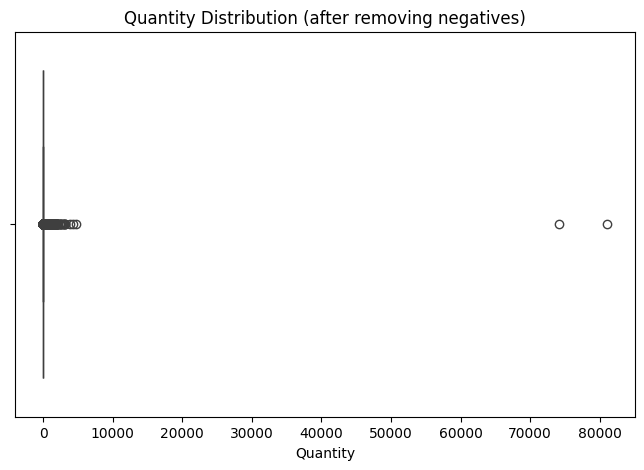

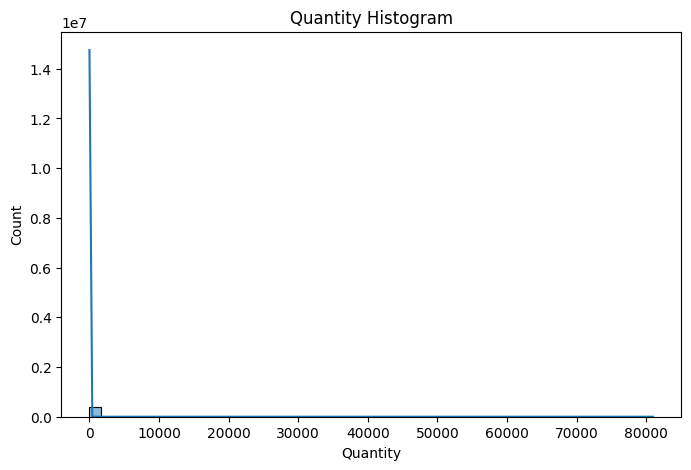

In [25]:
# Quantity Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Quantity'])
plt.title("Quantity Distribution (after removing negatives)")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title("Quantity Histogram")
plt.show()

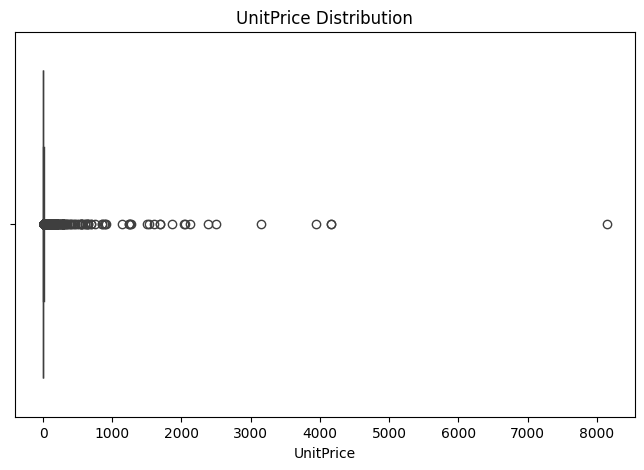

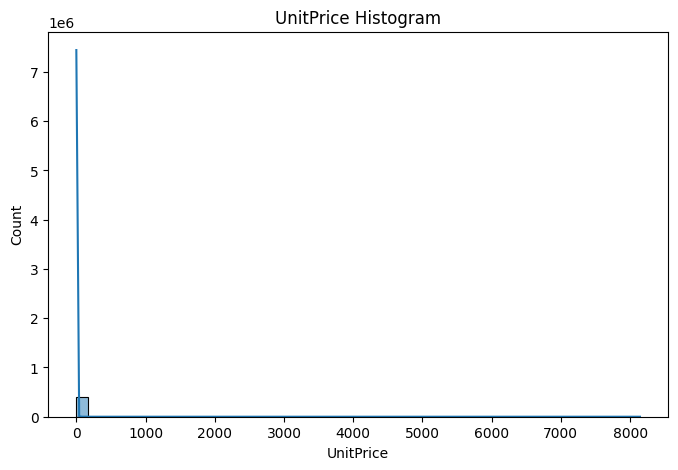

In [14]:

# UnitPrice Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['UnitPrice'])
plt.title("UnitPrice Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title("UnitPrice Histogram")
plt.show()

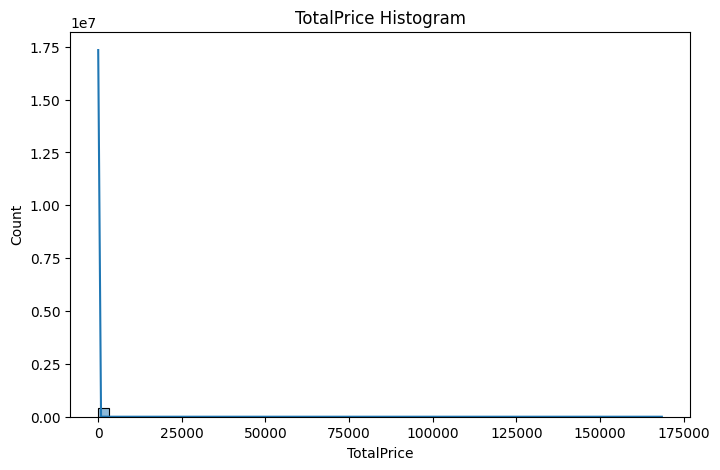

In [15]:
# TotalPrice Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title("TotalPrice Histogram")
plt.show()

In [16]:
# Quick Summary Table after Cleaning

summary = {
    "Total Transactions": len(df),
    "Unique Customers": df['CustomerID'].nunique(),
    "Unique Products": df['StockCode'].nunique(),
    "Unique Countries": df['Country'].nunique(),
    "Date Range": f"{df['InvoiceDate'].min().date()} → {df['InvoiceDate'].max().date()}",
    "Avg Quantity per Order": round(df['Quantity'].mean(), 2),
    "Avg Unit Price": round(df['UnitPrice'].mean(), 2),
    "Avg Total Price (per transaction)": round(df['TotalPrice'].mean(), 2),
    "Max Transaction Value": round(df['TotalPrice'].max(), 2)
}

import pandas as pd
summary_table = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
print(summary_table)


                              Metric                    Value
0                 Total Transactions                   392692
1                   Unique Customers                     4338
2                    Unique Products                     3665
3                   Unique Countries                       37
4                         Date Range  2010-12-01 → 2011-12-09
5             Avg Quantity per Order                    13.12
6                     Avg Unit Price                     3.13
7  Avg Total Price (per transaction)                    22.63
8              Max Transaction Value                 168469.6


**🟢 Step 2: RFM Metrics Calculation**

In [17]:
# Step 2: RFM Metrics Calculation

import pandas as pd

# Take reference date (usually the last date in dataset + 1 day)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group data by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

In [18]:

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Display first 10 rows
print("✅ RFM Metrics (first 10 customers):")
print(rfm.head(10))

✅ RFM Metrics (first 10 customers):
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40
12352            36          8   2506.04
12353           204          1     89.00
12354           232          1   1079.40
12355           214          1    459.40
12356            23          3   2811.43


**Step 3: RFM Scoring & Segmentation**

In [19]:

# Assign RFM quartile scores (1 to 5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])  # lower recency = higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])



# Combine into single RFM_Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


# Define segmentation map
seg_map = {
    r'[5][4-5][4-5]': 'Champions',
    r'[4-5][2-3][3-5]': 'Loyal Customers',
    r'[3-4][1-2][1-3]': 'Potential Loyalists',
    r'[2-3][2-3][2-3]': 'Need Attention',
    r'[1-2][4-5][4-5]': 'At Risk',
    r'[1][1-2][1-2]': 'Lost Customers'
}



# Apply segmentation
rfm['Segment'] = 'Other'
for pattern, segment in seg_map.items():
    rfm.loc[rfm['RFM_Score'].str.match(pattern), 'Segment'] = segment

In [20]:
# Show sample
print("✅ RFM Segmentation (first 15 customers):")
print(rfm.head(15)[['Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Score','Segment']])


✅ RFM Segmentation (first 15 customers):
            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
CustomerID                                                                   
12346           326          1  77183.60       1       1       5       115   
12347             2          7   4310.00       5       5       5       555   
12348            75          4   1797.24       2       4       4       244   
12349            19          1   1757.55       4       1       4       414   
12350           310          1    334.40       1       1       2       112   
12352            36          8   2506.04       3       5       5       355   
12353           204          1     89.00       1       1       1       111   
12354           232          1   1079.40       1       1       4       114   
12355           214          1    459.40       1       1       2       112   
12356            23          3   2811.43       4       3       5       435   
12357            33    

**Step 4: Visualizing RFM Segments**

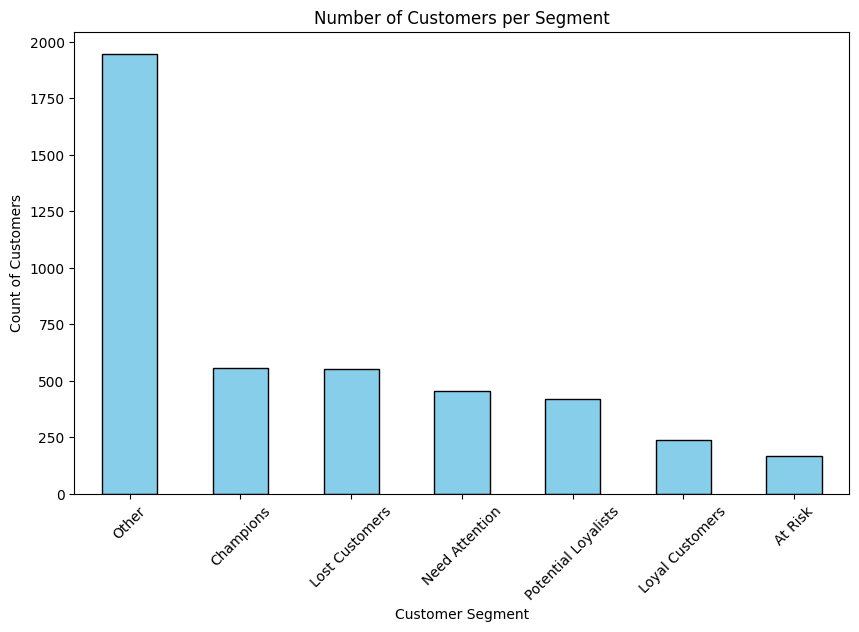

In [21]:
# 1. Bar chart - Number of customers per segment
plt.figure(figsize=(10,6))
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Customers per Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count of Customers")
plt.xticks(rotation=45)
plt.show()

C:\Users\M.ALI\AppData\Local\Temp\ipykernel_9444\764911307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Monetary', data=rfm.reset_index(), estimator='mean', errorbar=None, palette="viridis")


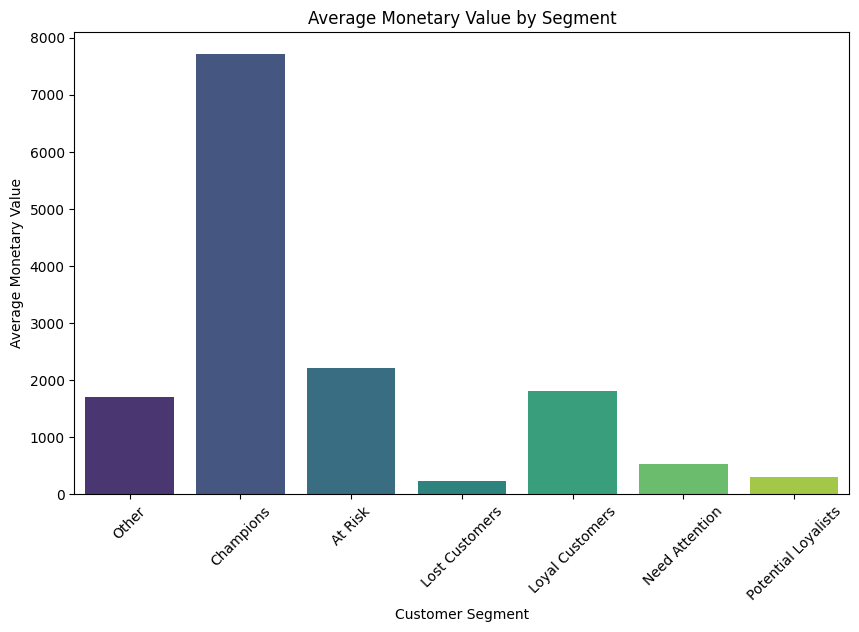

In [22]:

# 2. Average Monetary Value per segment
plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='Monetary', data=rfm.reset_index(), estimator='mean', errorbar=None, palette="viridis")
plt.title("Average Monetary Value by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Monetary Value")
plt.xticks(rotation=45)
plt.show()

C:\Users\M.ALI\AppData\Local\Temp\ipykernel_9444\1450697686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_Score','F_Score']).size().unstack(fill_value=0)


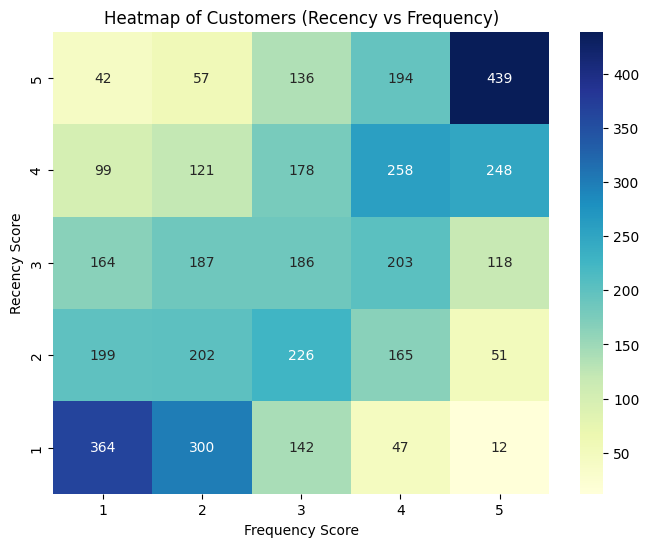

In [23]:
# 3. Heatmap - Recency vs Frequency
rfm_heatmap = rfm.groupby(['R_Score','F_Score']).size().unstack(fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(rfm_heatmap, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Customers (Recency vs Frequency)")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()

**Step 5: Marketing Strategy by Segment**

In this step, we will translate customer segments into actionable marketing strategies.
The purpose is to guide business teams on what to do next for each segment.

| Segment                  | Strategy (What to do?)          | Implementation (How to do it?)                                                  |
| ------------------------ | ------------------------------- | ------------------------------------------------------------------------------- |
| **Champions**            | Retain & reward                 | Loyalty programs, VIP offers, personalized thank-you emails, early access sales |
| **Loyal Customers**      | Increase engagement & value     | Product bundles, membership discounts, birthday offers, feedback requests       |
| **At Risk**              | Win back inactive customers     | Win-back campaigns, reminder emails, personalized product recommendations       |
| **Lost Customers**       | Attempt reactivation, else drop | Heavy discounts, reactivation emails, if no response → mark inactive            |
| **Others / Hibernating** | Nurture slowly                  | Social media engagement, newsletters, cross-selling low-cost products           |


**Step 6: Visualizing RFM Segments**

C:\Users\M.ALI\AppData\Local\Temp\ipykernel_9444\634840884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette="viridis")


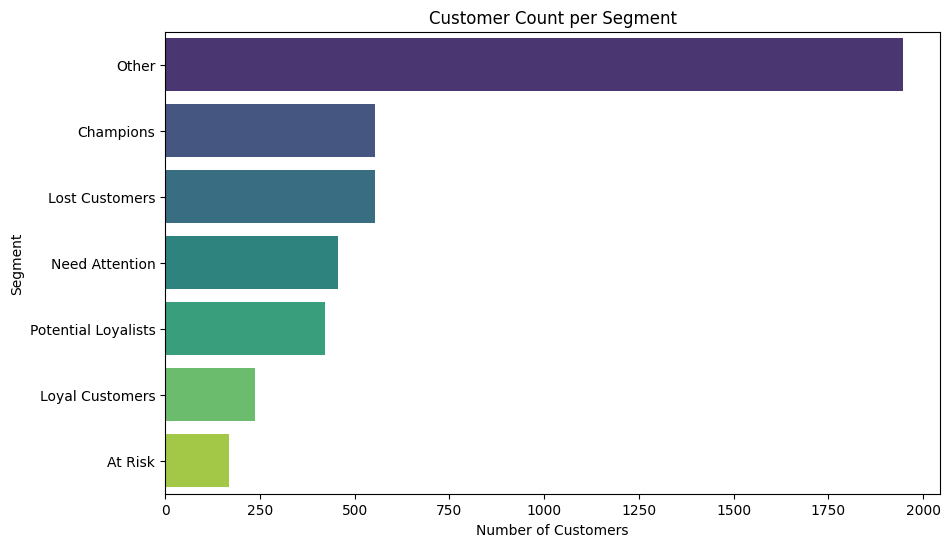

In [25]:

# Count of customers in each segment
plt.figure(figsize=(10,6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette="viridis")
plt.title("Customer Count per Segment")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.show()

In [26]:
# Average RFM values by Segment
segment_summary = rfm.groupby("Segment").agg({
    "Recency":"mean",
    "Frequency":"mean",
    "Monetary":"mean",
    "RFM_Score":"count"   # number of customers
}).rename(columns={"RFM_Score":"Num_Customers"}).reset_index()

print("✅ Segment Summary:")
print(segment_summary)

✅ Segment Summary:
               Segment     Recency  Frequency     Monetary  Num_Customers
0              At Risk  125.559524   5.529762  2205.350298            168
1            Champions    5.700901  13.576577  7712.526739            555
2       Lost Customers  279.518987   1.028933   225.059638            553
3      Loyal Customers   16.067511   2.358650  1807.922743            237
4       Need Attention   88.041667   1.861842   520.652417            456
5                Other   83.268105   3.918850  1706.644824           1947
6  Potential Loyalists   39.130332   1.092417   291.628104            422


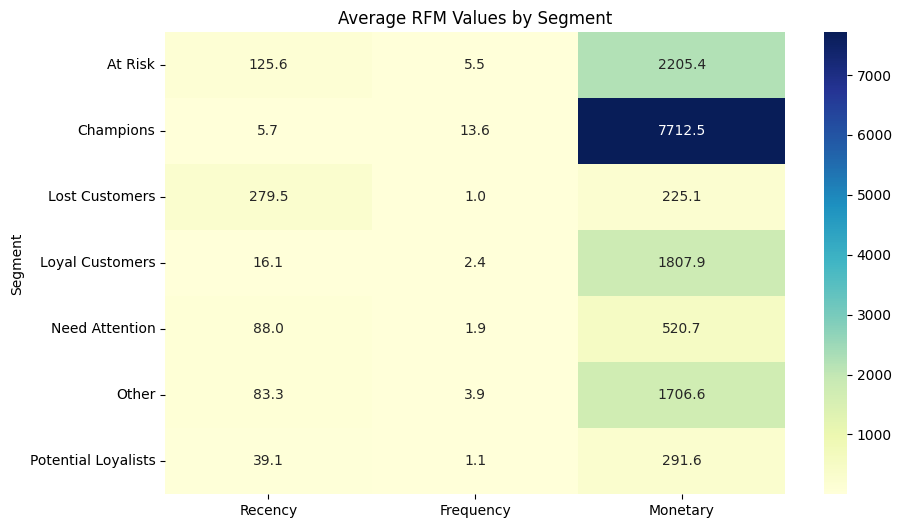

In [27]:
# Heatmap of Avg RFM per Segment
plt.figure(figsize=(10,6))
sns.heatmap(segment_summary.set_index("Segment")[["Recency","Frequency","Monetary"]],
            annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average RFM Values by Segment")
plt.show()